In [1]:
# 必要依赖：https://github.com/ecmwf/cfgrib
# conda install -c conda-forge eccodes
# conda install -c conda-forge cfgrib
import xarray
from datetime import datetime, timedelta
import numpy
import matplotlib.pyplot as plt

In [2]:
# air temperature 0.1° x 0.1°K=℃+273.15
era5_td_grib = '/remote_geo01/data_fd_et/ERA5_Td/2018_01.grib'

In [3]:
td_ds = xarray.load_dataset(era5_td_grib, engine="cfgrib")

/home/beichen/anaconda3/envs/python36/lib/python3.6/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
module 'cfgrib.messages' has no attribute 'DEFAULT_INDEXPATH'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
td_ds.dims

Frozen(SortedKeysDict({'time': 32, 'step': 24, 'latitude': 1201, 'longitude': 951}))

In [5]:
numpy.array(td_ds.isel(time=1, step=0).to_array())[:,:]/(1*60*60)

array([[[0.07105006, 0.07098386, 0.07091767, ...,        nan,
                nan,        nan],
        [0.0709996 , 0.07093395, 0.07086885, ...,        nan,
                nan,        nan],
        [0.07094643, 0.07088295, 0.07081676, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], dtype=float32)

In [6]:
td_ds

<xarray.Dataset>
Dimensions:     (latitude: 1201, longitude: 951, step: 24, time: 32)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2017-12-31 2018-01-01 ... 2018-01-31
  * step        (step) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 00:00:00
    surface     int64 0
  * latitude    (latitude) float64 60.0 59.9 59.8 59.7 ... -59.8 -59.9 -60.0
  * longitude   (longitude) float64 85.0 85.1 85.2 85.3 ... 179.8 179.9 180.0
    valid_time  (time, step) datetime64[ns] 2017-12-31T01:00:00 ... 2018-02-01
Data variables:
    d2m         (time, step, latitude, longitude) float32 nan nan ... nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-19T22:43:03 GRIB to CDM+CF via cfgrib-0....

In [7]:
td_ds.isel(time=0, step=0)

<xarray.Dataset>
Dimensions:     (latitude: 1201, longitude: 951)
Coordinates:
    number      int64 0
    time        datetime64[ns] 2017-12-31
    step        timedelta64[ns] 01:00:00
    surface     int64 0
  * latitude    (latitude) float64 60.0 59.9 59.8 59.7 ... -59.8 -59.9 -60.0
  * longitude   (longitude) float64 85.0 85.1 85.2 85.3 ... 179.8 179.9 180.0
    valid_time  datetime64[ns] 2017-12-31T01:00:00
Data variables:
    d2m         (latitude, longitude) float32 nan nan nan nan ... nan nan nan
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-03-19T22:43:03 GRIB to CDM+CF via cfgrib-0....

In [8]:
demo_td = numpy.array(td_ds.to_array())[0,0,23,:,:]

[[-17.75415  -17.97876  -18.20337  ...        nan        nan        nan]
 [-17.935791 -18.158447 -18.375244 ...        nan        nan        nan]
 [-18.121338 -18.340088 -18.564697 ...        nan        nan        nan]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]


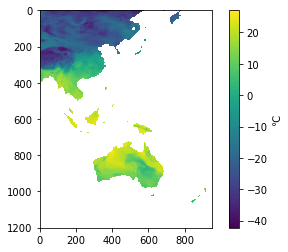

In [9]:
demo_td_show=demo_td-273.15
print(demo_td_show)
plt.imshow(demo_td_show) #！！！！！！
plt.colorbar(label='℃')

Text(0.5, 1.0, 'Original Td at UTC 2018-01-01 03:00:00')

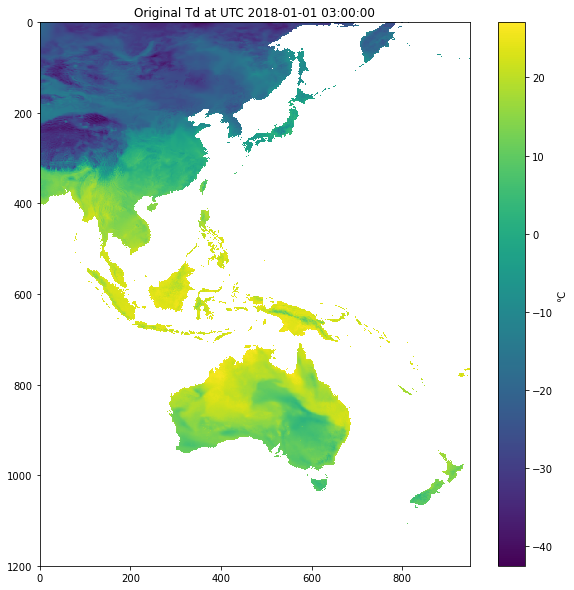

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(td_ds.to_array()[0,1,0, :,:]-273.15, interpolation='None')
plt.colorbar(label='℃')
plt.title('Original Td at UTC 2018-01-01 03:00:00')

In [11]:
# FD extent
resolution = 0.01 # degree
lats = numpy.arange(60.-resolution/2, -60, -resolution)
lons = numpy.arange(85.+resolution/2, 180, resolution)

In [12]:
day_num = 1 # 1 -> 31(?)
hour_idx = 2 # 0 <=> 01:00:00

td_dh = td_ds.isel(time=day_num, step=hour_idx)
fd_ds = td_dh.interp(longitude=lons, latitude=lats, method="linear", kwargs={"fill_value": "extrapolate"}) # linear
td_v = fd_ds.to_array()[0]-273.15

Text(0.5, 1.0, '0.01° Td in study extent at 2018-01-01 03:00:00')

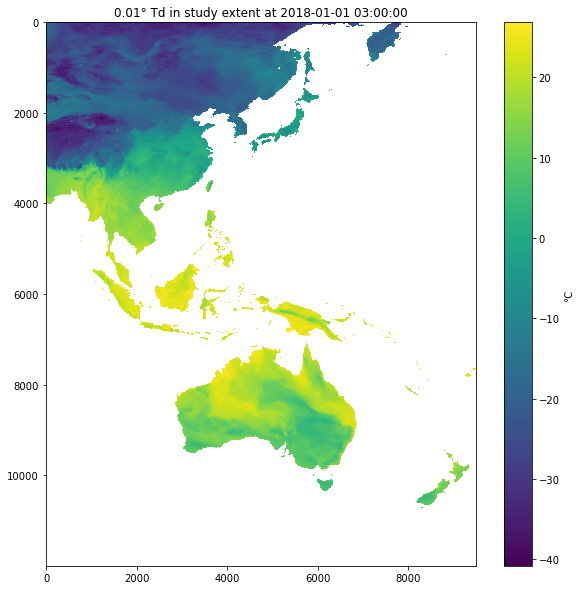

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(td_v, interpolation='None')
plt.colorbar(label='℃')
plt.title('0.01° Td in study extent at 2018-01-01 03:00:00')